<a href="https://colab.research.google.com/github/sarfraz079/codexcue.projects/blob/main/playsotre_apps_ipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/googleplaystore.csv.zip')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

483

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
total_apps=df['App'].count()
total_apps

8886

In [ ]:
max_rating=df['Rating'].max()
max_rating

5.0

In [ ]:
top2_apps_rating=df.sort_values(by='Rating',ascending=False).head(2)
top2_apps_rating[['App','Rating']]

,App,Rating
10609,"Trinity Church Deltona, FL",5.0
8101,NOMISMA.com.cy by FMW,5.0


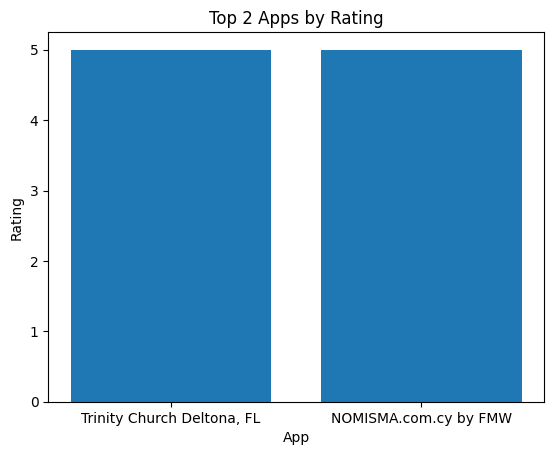

In [ ]:
plt.bar(top2_apps_rating['App'],top2_apps_rating['Rating'])
plt.xlabel('App')
plt.ylabel('Rating')
plt.title('Top 2 Apps by Rating')
plt.show()

In [ ]:
category_success = df.groupby('Category').agg({'Rating': 'mean', 'Installs': 'sum'})
category_success = category_success.sort_values(by=['Installs', 'Rating'], ascending=False).head(5)

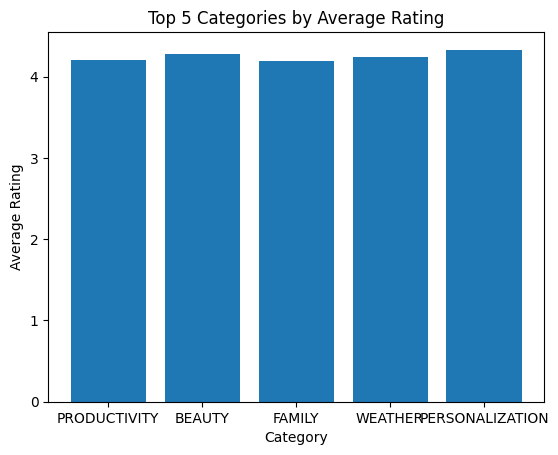

In [73]:
plt.bar(category_success.index, category_success['Rating'])
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Top 5 Categories by Average Rating')
plt.show()

In [ ]:
top_categories_by_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
top_categories_by_installs

,Installs
Category,
PRODUCTIVITY,"500,000,000+10,000,000+100,000,000+10,000,000+..."
BEAUTY,"500,000+1,000,000+100,000+500,000+1,000,000+50..."
FAMILY,"50,000,000+10,000,000+100,000,000+1,000,000+5,..."
WEATHER,"50,000,000+1,000,000+50,000,000+10,000+10,000,..."
PERSONALIZATION,"50,000,000+1,000,000+100,000,000+5,000,000+100..."
LIBRARIES_AND_DEMO,"50,000+10,000+100,000+100,000+5,000,000+50,000..."
LIFESTYLE,"5,000,000+10,000,000+100,000+10,000,000+5,000,..."
BOOKS_AND_REFERENCE,"100,000,000+50,000+100,000+10,000,000+100,000,..."
MAPS_AND_NAVIGATION,"100,000,000+5,000,000+10,000,000+10,000,000+5,..."


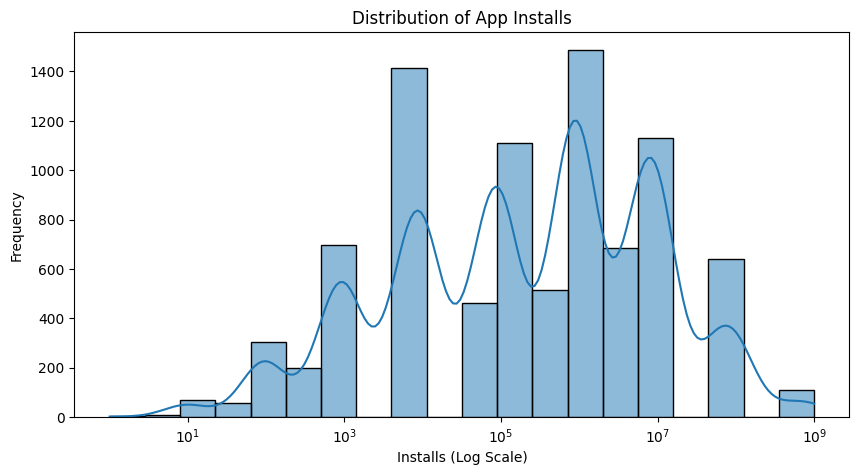

In [ ]:
# Assuming 'Installs' column is a string, convert it to numeric
df['Installs'] = pd.to_numeric(df['Installs'].str.replace('+', '').str.replace(',', ''), errors='coerce')

plt.figure(figsize=(10, 5))
sns.histplot(df['Installs'], bins=20, kde=True, log_scale=True)  # Log scale for better visualization
plt.title('Distribution of App Installs')
plt.xlabel('Installs (Log Scale)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
top_categories_by_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
top_categories_by_installs

,Installs
Category,
GAME,31543862717
COMMUNICATION,24152241530
SOCIAL,12513841475
PRODUCTIVITY,12463070180
TOOLS,11450224500
FAMILY,10041080590
PHOTOGRAPHY,9721243130
TRAVEL_AND_LOCAL,6361859300
VIDEO_PLAYERS,6221897200


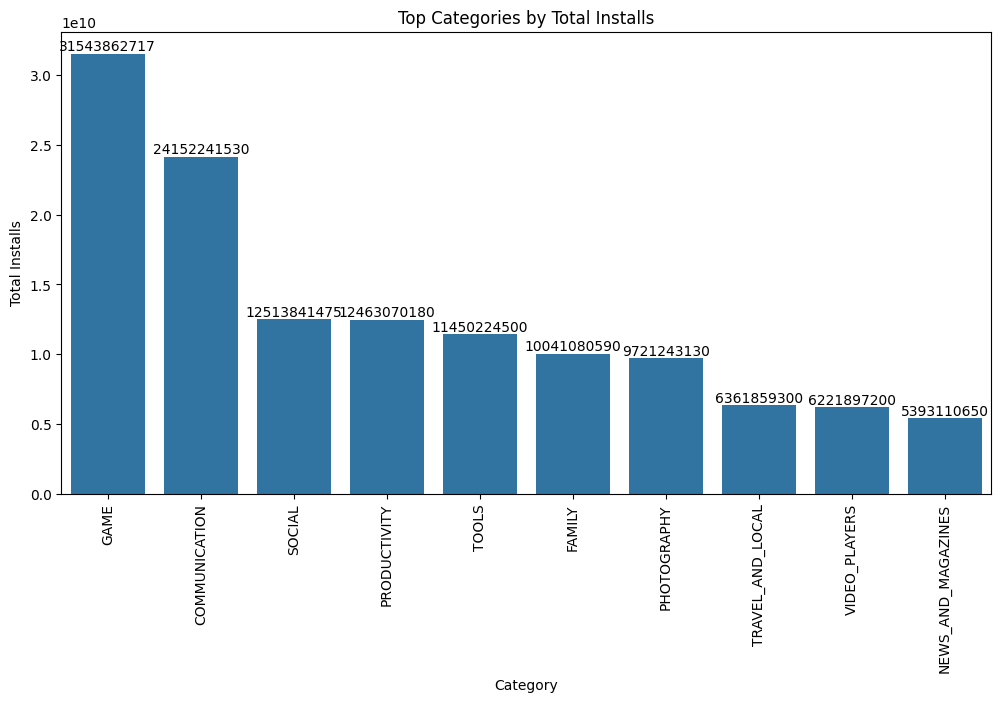

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories_by_installs.index, y=top_categories_by_installs.values)
plt.title('Top Categories by Total Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
for i, v in enumerate(top_categories_by_installs.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

In [ ]:
paid_apps_by_category = df[df['Type'] == 'Paid'].groupby('Category').size().sort_values(ascending=False).head(5)
paid_apps_by_category

,0
Category,
FAMILY,157
GAME,77
PERSONALIZATION,65
MEDICAL,64
TOOLS,63


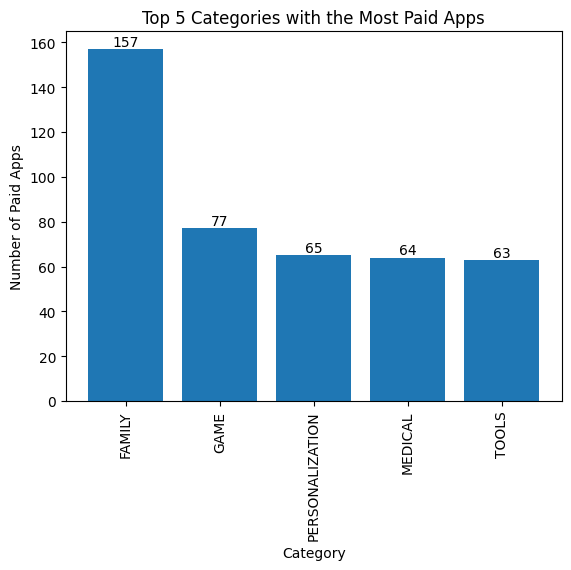

In [ ]:
plt.bar(paid_apps_by_category.index, paid_apps_by_category.values)
plt.xlabel('Category')
plt.ylabel('Number of Paid Apps')
plt.title('Top 5 Categories with the Most Paid Apps')
for i, v in enumerate(paid_apps_by_category.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

In [ ]:
latest_apps_by_installs = df.sort_values(by=['Last Updated', 'Installs'], ascending=[False, False]).head(5)
latest_apps_by_installs[['App', 'Last Updated', 'Installs']]

,App,Last Updated,Installs
10393,SnowMobile Parking Adventure,"September 9, 2016",1000000
9437,EI国际,"September 9, 2016",1000
6983,Best Friends Dress Up & Makeup,"September 9, 2015",500000
4398,Madagascar Surf n' Slides Free,"September 8, 2017",5000000
2952,Add Text To Photo,"September 8, 2017",1000000


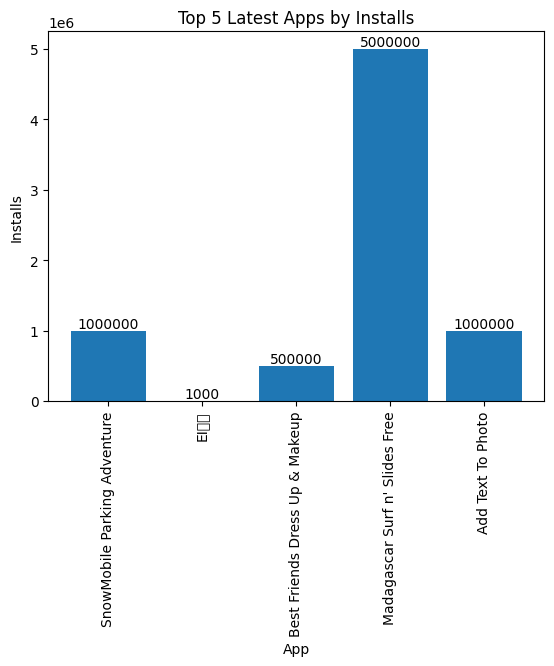

In [ ]:
plt.bar(latest_apps_by_installs['App'], latest_apps_by_installs['Installs'])
plt.xlabel('App')
plt.ylabel('Installs')
plt.title('Top 5 Latest Apps by Installs')
for i, v in enumerate(latest_apps_by_installs['Installs']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()